In [33]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import optuna

In [34]:
dfTrain = pd.read_csv("train.csv")
dfTest= pd.read_csv("test.csv")

dfTrain.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [35]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [36]:
dfTrain.describe()



,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [37]:
dfTrain.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [38]:
dfTrain.isna().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

<Axes: ylabel='count'>

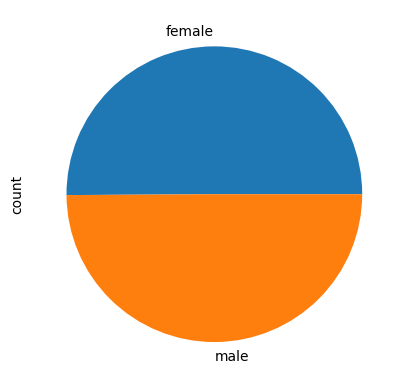

In [39]:
dfTrain["Sex"].value_counts().plot(kind = "pie")

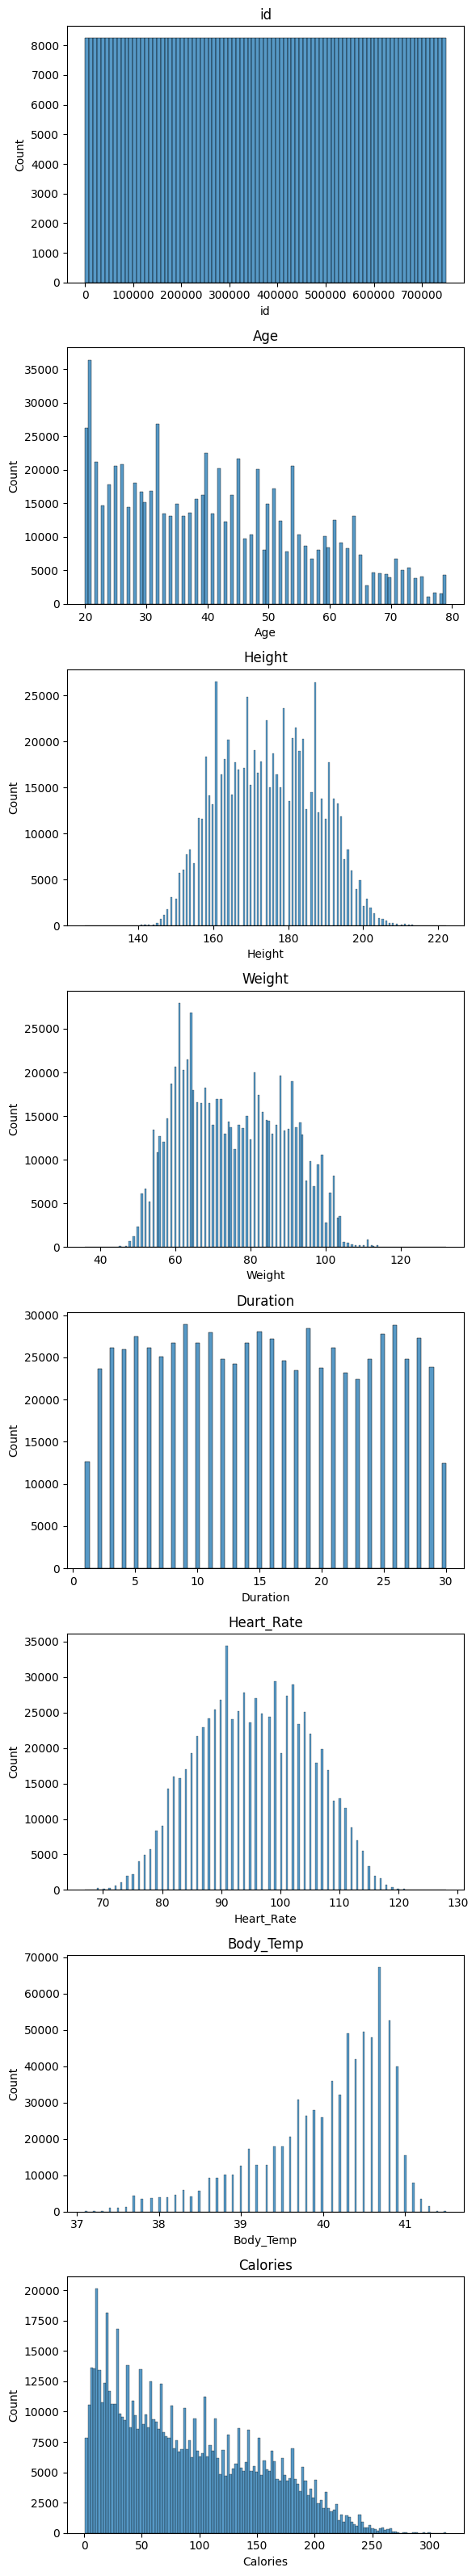

In [40]:
dfTrainNumericalCols = dfTrain.select_dtypes(include = "number")
num_cols = len(dfTrainNumericalCols.columns)


plt.figure(figsize=(6, 4 * num_cols))

for index, column_name in enumerate(dfTrainNumericalCols.columns, start=1):
    plt.subplot(num_cols, 1, index)
    sns.histplot(dfTrainNumericalCols[column_name].dropna())
    plt.title(f'{column_name}')

plt.tight_layout()
plt.show()

EDA for Clustering 

In [41]:
dfTrain['Sex'].unique()

array(['male', 'female'], dtype=object)

In [42]:
dfTrain['Sex'] = dfTrain['Sex'].map({'female': 0, 'male': 1})
dfTest['Sex'] = dfTest['Sex'].map({'female': 0, 'male': 1})

In [43]:
dfTrain['Sex'].unique()


array([1, 0])

In [44]:
dfTest['Sex'].unique()

array([1, 0])

In [45]:
dfTrain["Calories"].describe()

count    750000.000000
mean         88.282781
std          62.395349
min           1.000000
25%          34.000000
50%          77.000000
75%         136.000000
max         314.000000
Name: Calories, dtype: float64

In [46]:
dfTrain

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,1,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,0,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,0,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,1,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,0,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...,...
749995,749995,1,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,749996,0,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,749997,1,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,749998,1,45,182.0,91.0,17.0,102.0,40.3,109.0


In [47]:
le=  LabelEncoder()
dfTrain['Sex'] = le.fit_transform(dfTrain["Sex"])
dfTest["Sex"] =  le.fit_transform(dfTest["Sex"])

In [48]:
dfTrain.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [49]:
X_train =  dfTrain.drop(columns='Calories' , axis=1)
X_test =  dfTest


y_train = dfTrain["Calories"]

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.1, 
    random_state=42,       
    shuffle=True
)



In [50]:
scaler = StandardScaler()
X_trainScaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_valScaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_scaled =  pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [51]:
import numpy as np


def compute_rmsle(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))


In [ ]:
model = XGBRegressor(
    eval_metric="rmse",
    objective='reg:squarederror',
    alpha=20,               # Augmenter L1 régularisation
    lambda_=20,             # Ajouter une régularisation L2
    enable_categorical=True,
    random_state=42 , 
    early_stopping_rounds=50
)

model.fit(
    X_trainScaled, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False 
)

y_pred = model.predict(X_val)
y_pred = np.maximum(0, y_pred)  

rmsle = np.sqrt(compute_rmsle(y_val, y_pred))
print(f"RMSLE: {rmsle:.4f}")


c:\Users\gerar\Desktop\githubRepo\-AI-Projects\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [17:18:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)


RMSLE: 0.2576


In [53]:
df = dfTest.copy()

0          26.893053
1         108.198273
2          86.841423
3         125.242630
4          75.761398
             ...    
249995     26.650627
249996      9.844296
249997     71.998482
249998    168.317444
249999     77.211868
Name: Calories, Length: 250000, dtype: float32


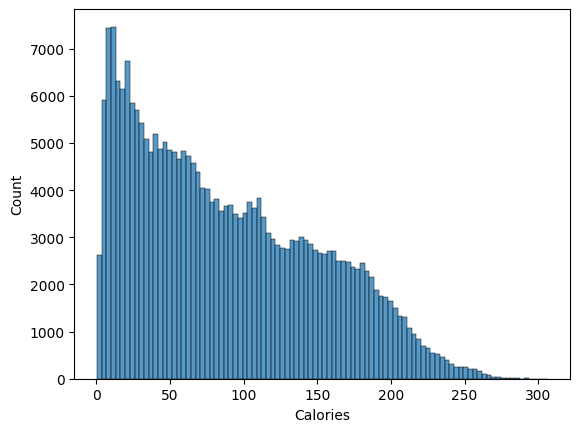

In [54]:
df["Calories"] = model.predict(X_test)
sns.histplot(df["Calories"].dropna())



df = df [['id' , 'Calories']]
print(df['Calories'])
df.to_csv('calories_predictions.csv', index=False)

In [55]:
df['Calories'].unique()

array([ 26.893053, 108.19827 ,  86.84142 , ...,   9.844296, 168.31744 ,
        77.21187 ], dtype=float32)

C:\Users\gerar\AppData\Local\Temp\ipykernel_5824\3507220622.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


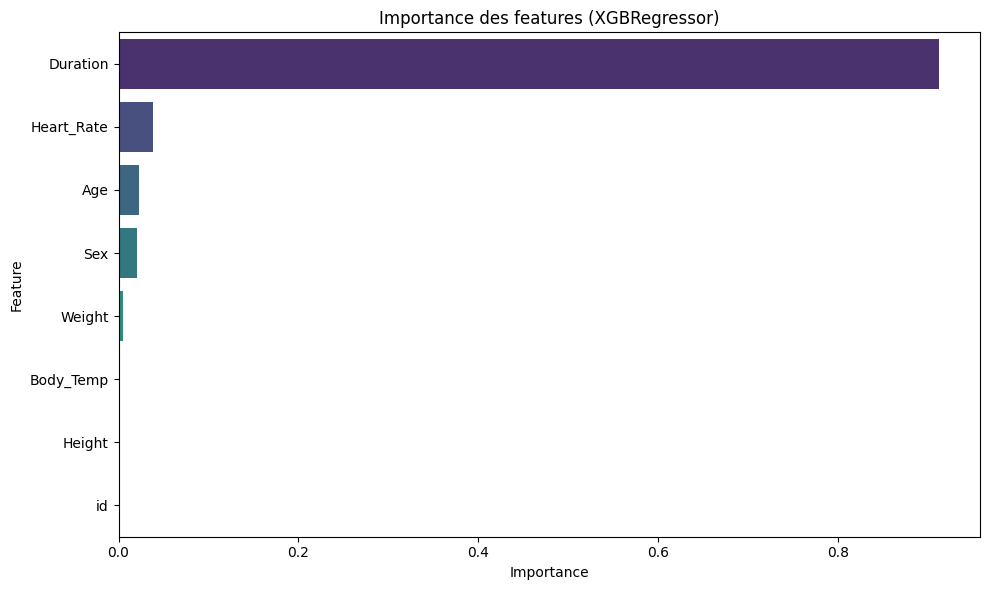

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feature_names = X_trainScaled.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title("Importance des features (XGBRegressor)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [57]:
model.save_model("modelKaggle.xgb")

c:\Users\gerar\Desktop\githubRepo\-AI-Projects\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [17:18:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [58]:
import xgboost
print(xgboost.__version__)

2.1.4


In [ ]:
def objective(trial):
    params = {
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.1, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 100, 2000),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bynode": trial.suggest_float("colsample_bynode", 0.3, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
        "tree_method": "hist",
        "enable_categorical": False,
        "device": "cpu",
        
        
    }

    model = XGBRegressor(**params , early_stopping_rounds=50)

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],

        verbose=False
    )

    y_pred = model.predict(X_val)
    score = compute_rmsle(y_val, y_pred)
    return score

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best RMSLE:", study.best_value)
print("Best params:", study.best_params)


[I 2025-05-09 17:18:40,119] A new study created in memory with name: no-name-7a352f42-710e-44c4-b61f-b5123abae0e5


In [ ]:
best_params = study.best_params
final_model = XGBRegressor(**best_params)

final_model.fit(
    X_trainScaled, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

final_model.save_model("modelFinalKaggle.xgb")

c:\Users\gerar\Desktop\githubRepo\-AI-Projects\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [16:15:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [ ]:
dfTest["Calories"] = model.predict(X_test)

In [ ]:
dfTest["Calories"] = final_model.predict(X_test)

In [ ]:
df = dfTest.copy()
print(dfTest)
df = df [['id' , 'Calories']]

df.to_csv('calories_predictions.csv', index=False)

            id  Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0       750000    1   45   177.0    81.0       7.0        87.0       39.8   
1       750001    1   26   200.0    97.0      20.0       101.0       40.5   
2       750002    0   29   188.0    85.0      16.0       102.0       40.4   
3       750003    0   39   172.0    73.0      20.0       107.0       40.6   
4       750004    0   30   173.0    67.0      16.0        94.0       40.5   
...        ...  ...  ...     ...     ...       ...         ...        ...   
249995  999995    0   56   159.0    62.0       6.0        85.0       39.4   
249996  999996    1   32   202.0   101.0       3.0        84.0       38.4   
249997  999997    0   31   164.0    64.0      14.0        98.0       40.1   
249998  999998    0   62   158.0    61.0      25.0       106.0       40.7   
249999  999999    1   31   199.0    96.0      15.0        98.0       39.9   

          Calories  
0       271.871399  
1       271.871399  
2       271.

C:\Users\gerar\AppData\Local\Temp\ipykernel_13168\372735525.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


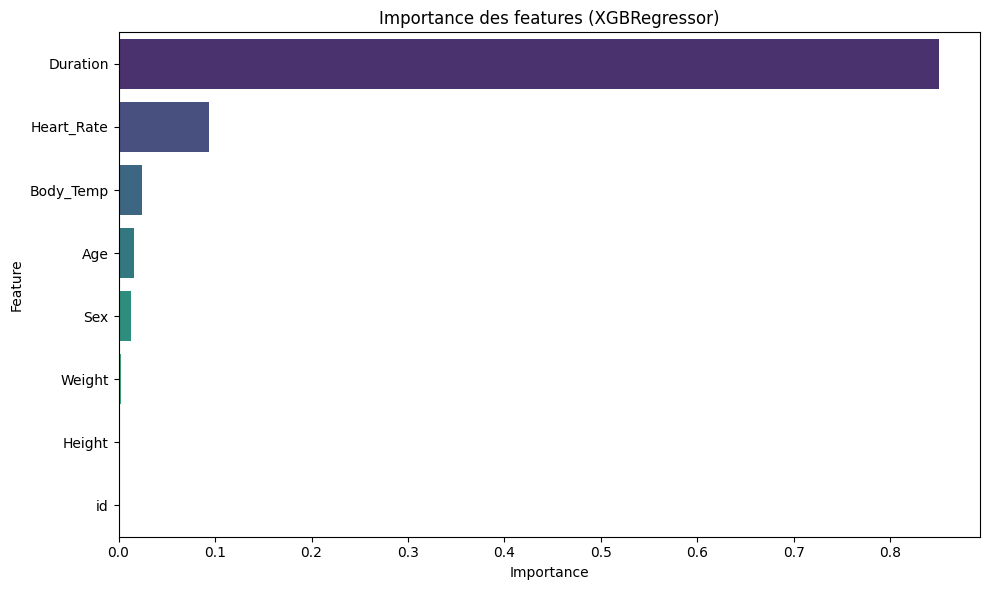

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = final_model.feature_importances_
feature_names = X_trainScaled.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title("Importance des features (XGBRegressor)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
